<a href="https://colab.research.google.com/github/choi-yh/DataStructure/blob/master/3_8_Moving_Average_(DeQueue_%EC%9D%91%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class Dequeue:
    def __init__(self):
        self.dq = []

    def insertFirst(self, item):
        self.dq.insert(0, item)
    
    def insertLast(self, item):
        self.dq.append(item)

    def isEmpty(self):
        if len(self.dq) == 0:
            return True
        else:
            return False

    # element return 후 삭제
    def popFirst(self):
        if self.isEmpty() == True:
            return None
        else:
            return self.dq.pop(0)

    def popLast(self):
        if self.isEmpty() == True:
            return None
        else:
            return self.dq.pop(-1)

    # element 삭제
    def removeFirst(self):
        if self.isEmpty() == True:
            return None
        else:
            del self.dq[0]

    def removeLast(self):
        if self.isEmpty() == True:
            return None
        else:
            del self.dq[-1]

    # return element
    def peekFisrt(self):
        if self.isEmpty() == True:
            return None
        else:
            return self.dq[0]

    def peekLast(self):
        if self.isEmpty() == True:
            return None
        else:
            return self.dq[-1]

    def print(self):
        print(self.dq)

    def sum(self):
        return sum(self.dq)

#### Moving Average
* 시계열 자료의 Smoothing 방법으로 주가 추세를 이해하는데 많이 사용됨
* $ y_1, y_2,\cdots, y_n$의 k-이동평균은 $y_i$ 에 대해 $y_i, y_{i+1}, y_{i+2}, \cdots , y_{i+k-1}$  데이터를 선택해 평균을 낸 값이 $ m_{i+(k//2)} $ 이다.

* 3-이동평균은 $y_1, y_2, y_3$ 3개의 자료에 대해 평균을 구해 $m_2$에 저장한다. 다음으로는 $y_2, y_3, y_4$ 의 평균을 이 자료의 가운데 위치에 $m_3$ 로 저장한다.
<center><img src="https://drive.google.com/uc?id=1B0PuhMcVrUD1UJklof4nIJqloDsXVxsf" width="500" height="200"></center>


* 이를 Dequeue를 이용해 구현하면 이전 Dequeue에서 popFirst하고 다음 자료를 insertLast 하면 된다.


In [0]:
# Dequeue 응용문제(이동평균)

from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('/gdrive/My Drive/Python/GitHub/DataStructure/data/stock_daily.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    data = list(reader)
    data = np.array(data).astype(float)

data.shape, data

((732, 5),
 array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
         8.31659973e+02],
        [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
         8.28070007e+02],
        [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
         8.24159973e+02],
        ...,
        [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
         5.56972503e+02],
        [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
         5.59992565e+02],
        [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
         5.58462551e+02]]))

In [0]:
data = data[:,-1] # 마지막 컬럼만 선택
data = data[::-1] # 데이터 순서 뒤집기 (첫 데이터가 가장 최신 데이터)
data.shape

(732,)

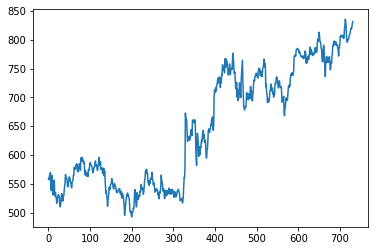

In [0]:
# plot

time = np.arange(0, data.shape[0])
plt.plot(time, data)
plt.show()

In [0]:
# 위 그래프에서 5점 이동평균 그래프를 그려보자
dq = Dequeue()
mavg = []
interval = 5

for i in range(interval):
    dq.insertLast(data[i])
mavg.append(dq.sum() / interval)

# blank 부분을 gap이라는 변수로 활용하셨는데 굳이 사용을 하지 않아도 되지않을까?
# interval 만큼 바로 dq에 넣고 빼면서 계산했다.
for tmp in data[interval+1:]:
    dq.removeFirst()
    dq.insertLast(tmp)
    mavg.append(dq.sum() / interval)

mavg = np.array(mavg)
mavg.shape

(727,)

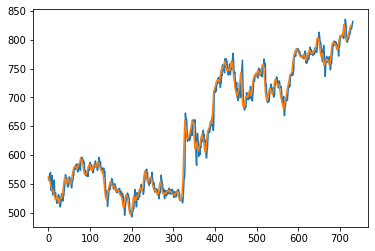

In [0]:
time2 = np.arange(0, mavg.shape[0])
plt.plot(time, data)
plt.plot(time2, mavg)
plt.show()